## Julia Interfacing with R and Python

In [38]:
using PyCall
using RCall
using DecisionTree
using DataFrames
using ScikitLearn
using VegaDatasets
ENV["COLUMNS"]=1000; # for dataframe column size

### R"" vs py"" String Macro

- R"" executes R commands inside the string and returns an R object 
- py"" executes Python commands with implicit conversion of python objects into Julia data type.

In [2]:
py"1+1" # returns julia numeric value by implicit conversion

2

In [3]:
R"result=1+1" # returns an RObject

RObject{RealSxp}
[1] 2


In [4]:
@rget result # use @rget macro to copy value from R to Julia

2.0

In [5]:
R"1+1" |> rcopy # or use rcopy to directoy convert R object into Julia data type 

2.0

### Defining a function in Python

In [6]:
py"""

import numpy as np

def mysin(x):
   return np.sin(x)
"""

In [7]:
py"mysin(10)" # calling python function

-0.5440211108893699

In [8]:
py"np.sin(10)"  # calling directly numpy sin function

-0.5440211108893699

In [12]:
pyimport("numpy").sin(10) # import numpy and call sin directly

-0.5440211108893699

### Defining a function in R

In [15]:
R"""
mysin <- function(x) {
   sin(x)
}
""";

In [16]:
R"mysin(10)" |> rcopy   # R"" returns an object which rcopy converts to Julia data

-0.5440211108893699

## Copying from-to R/Julia

In [17]:
iris = R"iris" |> rcopy # copy iris dataset from R to Julia
iris |> (x->first(x,5))

5×5 DataFrame
│ Row │ Sepal_Length │ Sepal_Width │ Petal_Length │ Petal_Width │ Species      │
│     │ Float64      │ Float64     │ Float64      │ Float64     │ Categorical… │
├─────┼──────────────┼─────────────┼──────────────┼─────────────┼──────────────┤
│ 1   │ 5.1          │ 3.5         │ 1.4          │ 0.2         │ setosa       │
│ 2   │ 4.9          │ 3.0         │ 1.4          │ 0.2         │ setosa       │
│ 3   │ 4.7          │ 3.2         │ 1.3          │ 0.2         │ setosa       │
│ 4   │ 4.6          │ 3.1         │ 1.5          │ 0.2         │ setosa       │
│ 5   │ 5.0          │ 3.6         │ 1.4          │ 0.2         │ setosa       │

In [18]:
df = DataFrame(a=rand(5),b=rand(5)) # create dataframe

5×2 DataFrame
│ Row │ a        │ b        │
│     │ Float64  │ Float64  │
├─────┼──────────┼──────────┤
│ 1   │ 0.505636 │ 0.113558 │
│ 2   │ 0.688869 │ 0.23248  │
│ 3   │ 0.541815 │ 0.532616 │
│ 4   │ 0.119688 │ 0.321245 │
│ 5   │ 0.212784 │ 0.641594 │

In [19]:
@rput df # copy df to R

5×2 DataFrame
│ Row │ a        │ b        │
│     │ Float64  │ Float64  │
├─────┼──────────┼──────────┤
│ 1   │ 0.505636 │ 0.113558 │
│ 2   │ 0.688869 │ 0.23248  │
│ 3   │ 0.541815 │ 0.532616 │
│ 4   │ 0.119688 │ 0.321245 │
│ 5   │ 0.212784 │ 0.641594 │

In [21]:
R"df" # check if R got df

RObject{VecSxp}
          a         b
1 0.5056360 0.1135579
2 0.6888689 0.2324796
3 0.5418147 0.5326158
4 0.1196877 0.3212453
5 0.2127838 0.6415939


### Plotting with R and Python

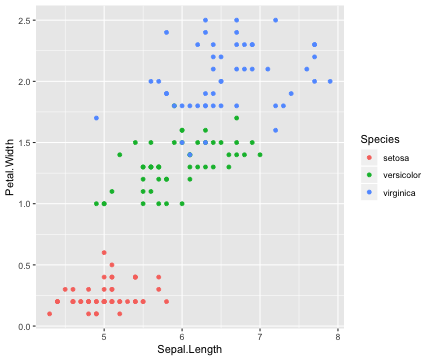

RObject{VecSxp}


In [23]:
R"""
library(ggplot2)

ggplot(iris,aes(x=Sepal.Length,y=Petal.Width))+geom_point(aes(color=Species))
"""

In [24]:
# won't run in binder
py"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
"""

###   Scikitlearn classifiers using Julia bindings of Python (PyCall.jl)

Let's load the `car` dataset for this example.

In [39]:
using VegaDatasets
cars=dataset("cars") |> DataFrame;
first(cars,5)

5×9 DataFrame
│ Row │ Name                      │ Miles_per_Gallon │ Cylinders │ Displacement │ Horsepower │ Weight_in_lbs │ Acceleration │ Year       │ Origin │
│     │ String                    │ Float64⍰         │ Int64     │ Float64      │ Int64⍰     │ Int64         │ Float64      │ String     │ String │
├─────┼───────────────────────────┼──────────────────┼───────────┼──────────────┼────────────┼───────────────┼──────────────┼────────────┼────────┤
│ 1   │ chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0        │ 130        │ 3504          │ 12.0         │ 1970-01-01 │ USA    │
│ 2   │ buick skylark 320         │ 15.0             │ 8         │ 350.0        │ 165        │ 3693          │ 11.5         │ 1970-01-01 │ USA    │
│ 3   │ plymouth satellite        │ 18.0             │ 8         │ 318.0        │ 150        │ 3436          │ 11.0         │ 1970-01-01 │ USA    │
│ 4   │ amc rebel sst             │ 16.0             │ 8         │ 304.0        │ 150        │ 3433          │ 12.0         │ 1970-01-01 │ USA    │
│ 5   │ ford torino               │ 17.0             │ 8         │ 302.0        │ 140        │ 3449          │ 10.5         │ 1970-01-01 │ USA    │

In [53]:
@rput cars
cars = R"cars = cars[complete.cases(cars),]" |> rcopy;

In [56]:
using PyCall
LNM = pyimport("sklearn.linear_model");
learner=LNM.LogisticRegression()

x=cars[:,[2,4,5,6,7]] |> Matrix
y=cars[:,:Cylinders] |> Array;

model=learner.fit(x, y)
yhat = model.predict(x)
accuracy = sum(yhat .== y) / length(y)
println("accuracy: $accuracy")

accuracy: 0.9413265306122449


In [60]:
R"table($yhat,$y)"

RObject{IntSxp}
   
      3   4   5   6   8
  3   4   0   0   0   0
  4   0 199   2  13   0
  6   0   0   1  66   3
  8   0   0   0   4 100


In [61]:
learner

PyObject LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
using ScikitLearn.CrossValidation: cross_val_score

KNN = pyimport("sklearn.neighbors")

modelKNN = KNN.KNeighborsClassifier(3)

cross_val_score(modelKNN, x, y; cv=10)  # 5-fold

┌ Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
└ @ ScikitLearn.Skcore /Users/ppalmes/.julia/packages/ScikitLearn/bo2Pt/src/cross_validation.jl:144


10-element Array{Float64,1}:
 0.8095238095238095
 0.9523809523809523
 0.9047619047619048
 0.8974358974358975
 0.9736842105263158
 1.0               
 0.8947368421052632
 0.9736842105263158
 0.868421052631579 
 0.9459459459459459

In [64]:
using ScikitLearn.GridSearch: GridSearchCV

GS=pyimport("sklearn.model_selection");

lbgfs=LNM.LogisticRegression(multi_class="auto",solver="lbfgs")

PyObject LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
gridsearch = GS.GridSearchCV(lbgfs, Dict(:C => 0.1:0.1:2.0))
res=gridsearch.fit(x, y)
println("Best parameters: $(res.best_params_)")

Best parameters: Dict{Any,Any}("C" => 0.6)


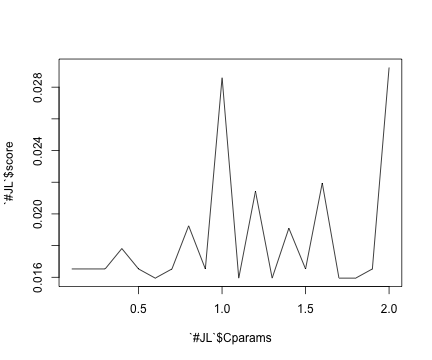

In [72]:
Cparams=convert.(Float64,res.cv_results_["param_C"])
score = res.cv_results_["std_test_score"]
R"plot($Cparams,$score,type='l')";

In [73]:
using PyCall
const ENS=pyimport("sklearn.ensemble")
const LM=pyimport("sklearn.linear_model")
const DA=pyimport("sklearn.discriminant_analysis")
const NN=pyimport("sklearn.neighbors")
const SVM=pyimport("sklearn.svm")
const TREE=pyimport("sklearn.tree")
const ANN=pyimport("sklearn.neural_network")
const GP=pyimport("sklearn.gaussian_process")
const KR=pyimport("sklearn.kernel_ridge")
const NB=pyimport("sklearn.naive_bayes")
const ISO=pyimport("sklearn.isotonic")

PyObject <module 'sklearn.isotonic' from '/Users/ppalmes/.julia/conda/3/lib/python3.7/site-packages/sklearn/isotonic.py'>

In [74]:
learners = Dict(
  "AdaBoostClassifier" => ENS.AdaBoostClassifier,
  "BaggingClassifier" => ENS.BaggingClassifier,
  "ExtraTreesClassifier" => ENS.ExtraTreesClassifier,
  "VotingClassifier" => ENS.VotingClassifier,
  "GradientBoostingClassifier" => ENS.GradientBoostingClassifier,
  "RandomForestClassifier" => ENS.RandomForestClassifier,
  "LDA" => DA.LinearDiscriminantAnalysis,
  "QDA" => DA.QuadraticDiscriminantAnalysis,
  "LogisticRegression" => LM.LogisticRegression,
  "PassiveAggressiveClassifier" => LM.PassiveAggressiveClassifier,
  "RidgeClassifier" => LM.RidgeClassifier,
  "RidgeClassifierCV" => LM.RidgeClassifierCV,
  "SGDClassifier" => LM.SGDClassifier,
  "KNeighborsClassifier" => NN.KNeighborsClassifier,
  "RadiusNeighborsClassifier" => NN.RadiusNeighborsClassifier,
  "NearestCentroid" => NN.NearestCentroid,
  "SVC" => SVM.SVC,
  "LinearSVC" => SVM.LinearSVC,
  "NuSVC" => SVM.NuSVC,
  "MLPClassifier" => ANN.MLPClassifier,
  "GaussianProcessClassifier" => GP.GaussianProcessClassifier,
  "DecisionTreeClassifier" => TREE.DecisionTreeClassifier,
  "GaussianNB" => NB.GaussianNB,
  "MultinomialNB" => NB.MultinomialNB,
  "ComplementNB" => NB.ComplementNB,
  "BernoulliNB" => NB.BernoulliNB
);

In [75]:
function sktrain(learner,x,y)
    model = learner()
    xx = x |> Matrix
    yy = y |> Array
    model.fit(xx,yy)
    return model
end

sktrain (generic function with 1 method)

In [76]:
function skpredict(themodel,x)
    xx = x |> Matrix
    return themodel.predict(xx) |> collect
end

skpredict (generic function with 1 method)

In [117]:
R"""
cars = cars[complete.cases(cars),]
cars$Cylinders = as.factor(cars$Cylinders)

trainIndex <- createDataPartition(cars$Cylinders, p = .8,list=F)
train = cars[trainIndex,]
test = cars[-trainIndex,]
"""
@rget train test;

In [118]:
xtrain=train[:,[2,4,5,6,7]] |> Matrix
ytrain=train[:,:Cylinders] |> Array;
xtest=test[:,[2,4,5,6,7]] |> Matrix
ytest=test[:,:Cylinders] |> Array;

### Try ExtraTrees Classifier

In [122]:
modelLR = sktrain(learners["ExtraTreesClassifier"],xtrain,ytrain)
yhat = skpredict(modelLR,xtest);
acc=sum(yhat .== ytest) / length(yhat)

0.96

### Try AdaBoost Classifier

In [95]:
modelLR = sktrain(learners["AdaBoostClassifier"],x,y)
res = skpredict(modelLR,x);
acc=sum(res .== y) / length(y)

0.7040816326530612

### Try RandomForest Classifier

In [123]:
modelLR = sktrain(learners["RandomForestClassifier"],x,y)
res = skpredict(modelLR,x);
acc=sum(res .== y) / length(y)

0.9897959183673469

### Let's use R's Caret to predict Cars' Cylinders

In [97]:
using RCall
R"""
library(caret)
library(e1071)
library(randomForest)
library(xgboost)
"""

┌ Warning: RCall.jl: Loading required package: lattice
└ @ RCall /Users/ppalmes/.julia/packages/RCall/g7dhB/src/io.jl:113
┌ Warning: RCall.jl: randomForest 4.6-14
│ Type rfNews() to see new features/changes/bug fixes.
│ 
│ Attaching package: ‘randomForest’
│ 
│ The following object is masked from ‘package:ggplot2’:
│ 
│     margin
│ 
└ @ RCall /Users/ppalmes/.julia/packages/RCall/g7dhB/src/io.jl:113


RObject{StrSxp}
 [1] "xgboost"      "randomForest" "e1071"        "caret"        "lattice"     
 [6] "ggplot2"      "stats"        "graphics"     "grDevices"    "utils"       
[11] "datasets"     "methods"      "base"        


In [127]:
function crtrain(learner,x::DataFrame,y::Vector)
    xx = x |> DataFrame # DataFrame(x)
    yy = y |> Vector
    model = rcall(:train,xx,yy,method=learner)
    return model
end

crtrain (generic function with 1 method)

In [128]:
function crtpredict(model,x)
    xx = x |> DataFrame
    res = rcall(:predict,model,xx) #in robj
    return rcopy(res) |> collect  # return extracted robj
end

crtpredict (generic function with 1 method)

### Let's try RandForest in R

In [131]:
xtrain=train[:,[2,4,5,6,7]] |> DataFrame
ytrain=train[:,:Cylinders] |> Array;
xtest=test[:,[2,4,5,6,7]] |> DataFrame
ytest=test[:,:Cylinders] |> Array;

In [132]:
crtmodel = crtrain("rf",xtrain,ytrain)
ypred = crtpredict(crtmodel,xtest);
acc = sum(ypred .== ytest) / length(ytest)

┌ Warning: RCall.jl: Warning: model fit failed for Resample01: mtry=2 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
│   Can't have empty classes in y.
│ 
│ Warning: model fit failed for Resample01: mtry=3 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
│   Can't have empty classes in y.
│ 
│ Warning: model fit failed for Resample01: mtry=5 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
│   Can't have empty classes in y.
│ 
│ Warning in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo,  :
│   There were missing values in resampled performance measures.
└ @ RCall /Users/ppalmes/.julia/packages/RCall/g7dhB/src/io.jl:113


0.9866666666666667

In [133]:
crtmodel = crtrain("svmRadial",xtrain,ytrain)
ypred = crtpredict(crtmodel,xtest) 
sum(ypred .== ytest) / length(ytest)

0.9733333333333334

In [134]:
crtmodel = crtrain("treebag",xtrain,ytrain)
ypred = crtpredict(crtmodel,xtest) 
sum(ypred .== ytest) / length(ytest)

0.9866666666666667